In [2]:
import fastf1 as f1
import fastf1.plotting
import matplotlib.pyplot as plt
import numpy as np
fastf1.plotting.setup_mpl(color_scheme='fastf1')
import datetime
import os


fastf1.Cache.enable_cache(os.getcwd())

/Users/peterclark/opt/anaconda3/envs/main/lib/python3.10/site-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


In [3]:
now = datetime.date.today().strftime('%Y-%m-%d')
print(f"The date today is: {now}\nThe races that have already happened are the following:")
schedule = f1.get_event_schedule(2024)
schedule_to_date = schedule[schedule.EventDate<now]
schedule_to_date = schedule_to_date[schedule_to_date.RoundNumber>0]
print(f"{schedule_to_date[['Location','EventDate']].to_string(index=False, header=False)}")
n=max(schedule_to_date['RoundNumber'])+1
print(f"---Next Race---\n{schedule.Location.loc[n]} {schedule.EventDate.loc[n].strftime('%Y-%m-%d')}")

The date today is: 2024-11-07
The races that have already happened are the following:
           Sakhir 2024-03-02
           Jeddah 2024-03-09
        Melbourne 2024-03-24
           Suzuka 2024-04-07
         Shanghai 2024-04-21
            Miami 2024-05-05
            Imola 2024-05-19
           Monaco 2024-05-26
         Montréal 2024-06-09
        Barcelona 2024-06-23
        Spielberg 2024-06-30
      Silverstone 2024-07-07
         Budapest 2024-07-21
Spa-Francorchamps 2024-07-28
        Zandvoort 2024-08-25
            Monza 2024-09-01
             Baku 2024-09-15
       Marina Bay 2024-09-22
           Austin 2024-10-20
      Mexico City 2024-10-27
        São Paulo 2024-11-03
---Next Race---
Las Vegas 2024-11-23


In [4]:
session_name='São Paulo'

session = f1.get_session(2024,session_name, 'Race')
session.load(telemetry=False, weather=False)

core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '31', '10', '63', '16', '4', '22', '81', '30', '44', '11', '50', '77', '14', '24', '55', '43', '23', '18', '27']


In [5]:
for i,d in enumerate(fastf1.plotting._DEPR_DRIVER_COLORS):
    print(f"{i} {d}")

0 valtteri bottas
1 zhou guanyu
2 theo pourchaire
3 nyck de vries
4 yuki tsunoda
5 daniel ricciardo
6 liam lawson
7 isack hadjar
8 ayumu iwasa
9 pierre gasly
10 esteban ocon
11 jack doohan
12 fernando alonso
13 lance stroll
14 felipe drugovich
15 charles leclerc
16 carlos sainz
17 robert shwartzman
18 oliver bearman
19 kevin magnussen
20 nico hulkenberg
21 oscar piastri
22 lando norris
23 pato oward
24 lewis hamilton
25 george russell
26 frederik vesti
27 max verstappen
28 sergio perez
29 jake dennis
30 alexander albon
31 logan sargeant
32 zak osullivan
33 franco colapinto


In [6]:
print(session.laps.pick_driver('ALB'))


Empty DataFrame
Columns: [Time, Driver, DriverNumber, LapTime, LapNumber, Stint, PitOutTime, PitInTime, Sector1Time, Sector2Time, Sector3Time, Sector1SessionTime, Sector2SessionTime, Sector3SessionTime, SpeedI1, SpeedI2, SpeedFL, SpeedST, IsPersonalBest, Compound, TyreLife, FreshTyre, Team, LapStartTime, LapStartDate, TrackStatus, Position, Deleted, DeletedReason, FastF1Generated, IsAccurate]
Index: []

[0 rows x 31 columns]


/Users/peterclark/opt/anaconda3/envs/main/lib/python3.10/site-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/Users/peterclark/opt/anaconda3/envs/main/lib/python3.10/site-packages/fastf1/plotting/_plotting.py:151: FutureWarning: The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.
  warnings.warn("The function `driver_color` is deprecated and will be "


VER
OCO
GAS
RUS
LEC
NOR
TSU
PIA
LAW
HAM
PER
BEA
BOT
ALO
ZHO
SAI
COL


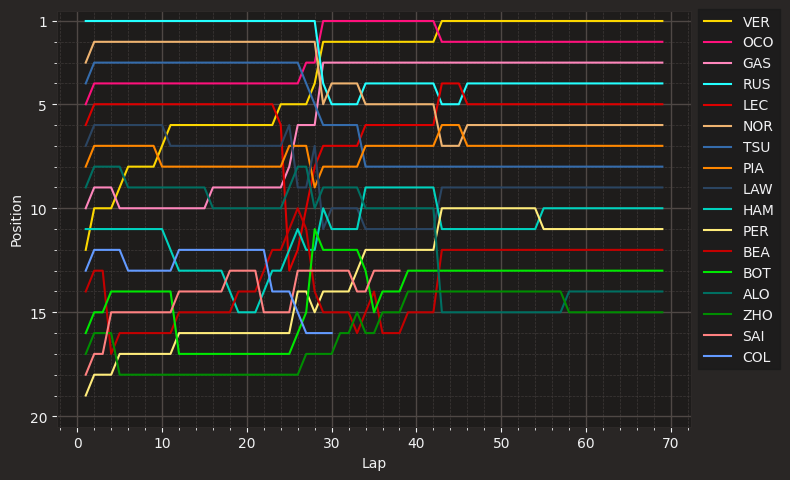

In [7]:
## Here we are going to plot position changes during Suzuka
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

fig,ax=plt.subplots(figsize=(8,4.9))
for driver in session.drivers:
    driver_laps = session.laps.pick_driver(driver)
    if len(driver_laps['Driver'])>0:
        name_abbr = driver_laps['Driver'].iloc[0] ## 3 lettername abbreviation in laps format
    else:
        break
    print(name_abbr)
    color= fastf1.plotting.driver_color(name_abbr)
    ax.plot(driver_laps['LapNumber'], driver_laps['Position'], label=name_abbr, color=color)

ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()


In [8]:

session.total_laps

71

In [9]:
## Get and organize lap stint data
all_laps=session.laps
drivers=session.drivers
drivers=[session.get_driver(drvr)["Abbreviation"] for drvr in drivers] # get abbr

finishing_order = [session.get_driver(i)["Abbreviation"] for i in session.drivers]

stints = all_laps[["Driver", "Stint", "Compound", "LapNumber"]] # only data we are curious in
stints = stints.groupby(["Driver", "Stint", "Compound"]) # group first by driver, then by stint, then by compound
stints = stints.count().reset_index() # replace index with length of stints
stints = stints.rename(columns={"LapNumber":"StintLength"}) # change index header to new name

In [23]:
print(finishing_order)

['VER', 'OCO', 'GAS', 'RUS', 'LEC', 'NOR', 'TSU', 'PIA', 'LAW', 'HAM', 'PER', 'BEA', 'BOT', 'ALO', 'ZHO', 'SAI', 'COL', 'ALB', 'STR', 'HUL']


/Users/peterclark/opt/anaconda3/envs/main/lib/python3.10/site-packages/fastf1/plotting/__init__.py:82: FutureWarning: COMPOUND_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "


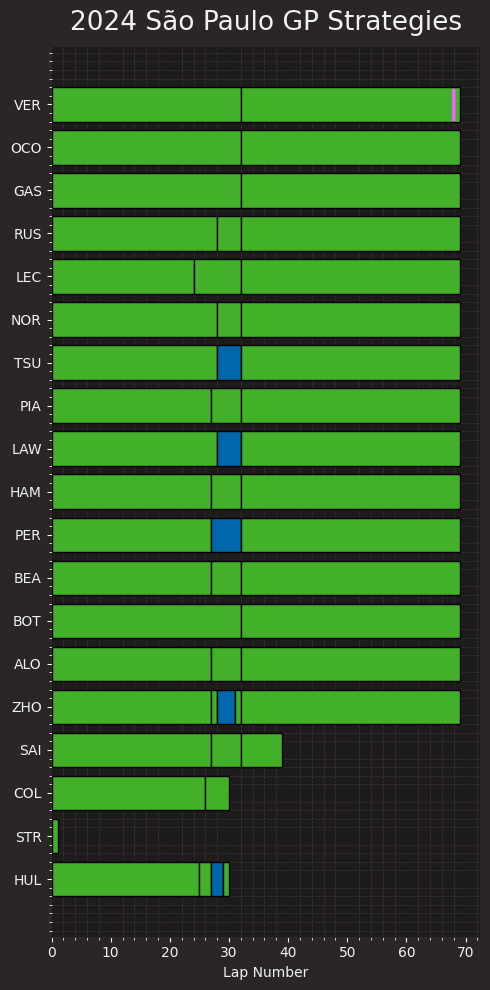

In [24]:
fix, ax=plt.subplots(figsize=(5,10))
for driver in drivers:
    driver_stints = stints.loc[stints["Driver"]==driver]
    prev_stint_end=0

    for idx, row in driver_stints.iterrows():
        #plt stacked bar horizontally
        plt.barh(y=driver, 
                    width=row["StintLength"], 
                    left=prev_stint_end, 
                    color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]], #tirecolor
                    edgecolor="black", 
                    fill=True)
        prev_stint_end+=row["StintLength"]
plt.title(f"2024 {session_name} GP Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
text_y = finishing_order.index(all_laps.pick_fastest()['Driver'])
plt.text(x=all_laps.pick_fastest()['LapNumber'], y=text_y+0.2, s="|", fontsize=23, fontweight='bold', color='#F461FF')

ax.invert_yaxis() # invert y-axis so drivers that finish higher are closer to the top
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.show()

In [10]:
## Laptime Distribution ##
all_driver_laps = session.laps.pick_drivers(drivers).pick_quicklaps()
all_driver_laps = all_driver_laps.reset_index()
driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}
driver_colors['COL']="#012564"
results=session.results[['Abbreviation', 'ClassifiedPosition']]
results['Abbreviation']

/Users/peterclark/opt/anaconda3/envs/main/lib/python3.10/site-packages/fastf1/plotting/__init__.py:82: FutureWarning: DRIVER_TRANSLATE is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "
/Users/peterclark/opt/anaconda3/envs/main/lib/python3.10/site-packages/fastf1/plotting/__init__.py:82: FutureWarning: DRIVER_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "


1     VER
31    OCO
10    GAS
63    RUS
16    LEC
4     NOR
22    TSU
81    PIA
30    LAW
44    HAM
11    PER
50    BEA
77    BOT
14    ALO
24    ZHO
55    SAI
43    COL
23    ALB
18    STR
27    HUL
Name: Abbreviation, dtype: object

In [11]:
driver_colors

{'LEC': '#dc0000',
 'SAI': '#ff8181',
 'SHW': '#9c0000',
 'VER': '#721aaa',
 'PER': '#a14cd6',
 'DEN': '#907400',
 'PIA': '#ff8700',
 'NOR': '#eeb370',
 'OWA': '#ee6d3a',
 'GAS': '#fe86bc',
 'OCO': '#ff117c',
 'DOO': '#894667',
 'BOT': '#00e701',
 'ZHO': '#008d01',
 'POU': '#004601',
 'DEV': '#1e3d61',
 'TSU': '#356cac',
 'RIC': '#2b4562',
 'LAW': '#2b4562',
 'HAD': '#1e6176',
 'IWA': '#1e6176',
 'MAG': '#ffffff',
 'HUL': '#cacaca',
 'BEA': '#c40000',
 'ALO': '#006f62',
 'STR': '#00413b',
 'DRU': '#2f9b90',
 'HAM': '#00d2be',
 'RUS': '#24ffff',
 'VES': '#00a6ff',
 'ALB': '#005aff',
 'COL': '#012564',
 'OSU': '#1b3d97'}

In [11]:
import seaborn as sns

In [12]:
print(all_driver_laps)

     index                   Time Driver DriverNumber                LapTime  \
0        4 0 days 01:19:19.692000    VER            1 0 days 00:01:25.394000   
1        5 0 days 01:20:44.003000    VER            1 0 days 00:01:24.311000   
2        6 0 days 01:22:08.345000    VER            1 0 days 00:01:24.342000   
3        7 0 days 01:23:33.002000    VER            1 0 days 00:01:24.657000   
4        8 0 days 01:24:57.780000    VER            1 0 days 00:01:24.778000   
..     ...                    ...    ...          ...                    ...   
755   1130 0 days 03:13:57.033000    PIA           81 0 days 00:01:21.840000   
756   1131 0 days 03:15:18.917000    PIA           81 0 days 00:01:21.884000   
757   1132 0 days 03:16:41.203000    PIA           81 0 days 00:01:22.286000   
758   1133 0 days 03:18:02.922000    PIA           81 0 days 00:01:21.719000   
759   1134 0 days 03:19:24.454000    PIA           81 0 days 00:01:21.532000   

     LapNumber  Stint PitOutTime PitInT

In [60]:
def plot_driver_laptime_distribution(driver_laps, finishing_order, driver_colors):
    fig, ax = plt.subplots(figsize=(12, 5))
    all_driver_laps["LapTime(s)"] = all_driver_laps["LapTime"].dt.total_seconds()
    violin= sns.violinplot(data=driver_laps,
                x="Driver",
                y="LapTime(s)",
                width=1,
                dodge=False,
                hue="Driver",
                order=finishing_order,
                hue_order=finishing_order,
                palette=driver_colors,
                whiskerprops=dict(color='white'),
                capprops=dict(color='white')
                )
    # Identify location of correct violins
    """ for i, violin_collection in enumerate(violin.collections):
        print("Violin", i+1, ":", violin_collection)
        if i%2==0:
            violin.collections[i].set_alpha(0) """

    # Show spread of laptimes by tire type
    """ sns.swarmplot(data=driver_laps,
                x="Driver",
                y="LapTime(s)",
                order=finishing_order,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                hue_order=["SOFT", "MEDIUM", "HARD"],
                linewidth=0,
                size=3,
                ) """

    # Drivers who DNF'd have reduced opacity
    for d in range(len(finishing_order)):
        drvr=finishing_order[d]
        n = np.where(results['Abbreviation']==drvr)[0][0]
        if results['ClassifiedPosition'][d]=='R':
            print(f"{d} {results['Abbreviation'][d]}")
            violin.collections[2*d].set_alpha(0.3)

    ax.set_xlabel("Driver")
    ax.set_ylabel("Lap Time (s)")
    plt.suptitle(f"2024 {session_name} Grand Prix Lap Time Distributions")
    ax.legend(bbox_to_anchor=(1.10, 1.02))
    plt.show()

15 SAI
16 COL


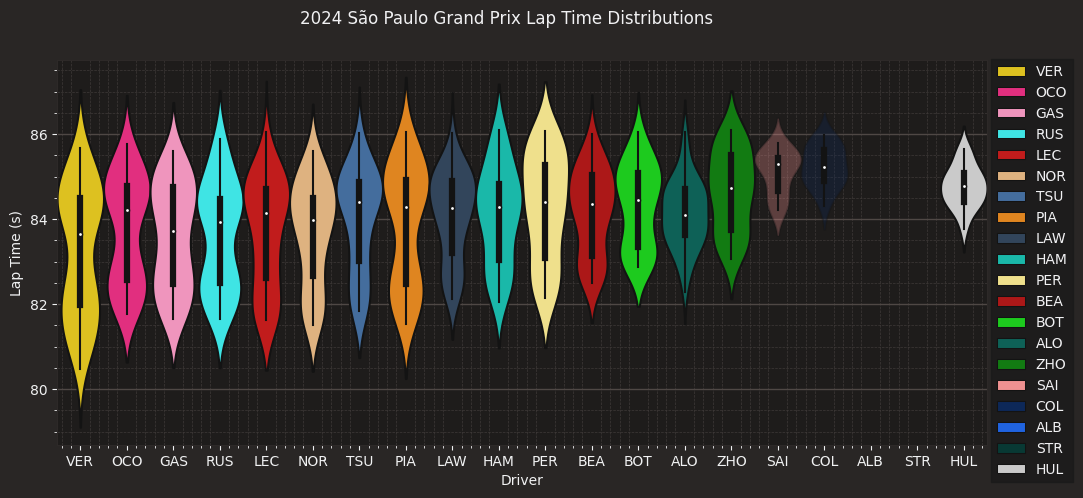

In [61]:
plot_driver_laptime_distribution(all_driver_laps, finishing_order, driver_colors)

In [58]:
def plot_drivers_laptimes(session, drivers, start_lap=1, end_lap=session.total_laps):
    fig, ax = plt.subplots(figsize=(12,5))
    
    for drvr in drivers:
        color=fastf1.plotting.get_driver_color(drvr,session)
        driver_laps=all_driver_laps.pick_driver(drvr)
        driver_laps_subset = driver_laps[(driver_laps['LapNumber'] >= start_lap) & 
                                         (driver_laps['LapNumber'] <= end_lap)]
        plt.plot(driver_laps_subset['LapNumber'], 
                 driver_laps_subset['LapTime'].dt.total_seconds(), 
                 marker='x', 
                 label=driver_laps['Driver'].iloc[0],
                 color=color,
                 linestyle=':',
                 linewidth=1)
        
        trendline_alpha=0

        # Plot x^2 trendline
        if len(driver_laps_subset)>1:
            coeffs = np.polyfit(driver_laps_subset['LapNumber'], driver_laps_subset['LapTime'].dt.total_seconds(), 2)
            trendline = np.polyval(coeffs, driver_laps_subset['LapNumber'])
            plt.plot(driver_laps_subset['LapNumber'], 
                     trendline, 
                     linestyle="--", 
                     color=color, 
                     alpha=trendline_alpha, 
                     linewidth=0.5)
    plt.xlabel('Lap Number')
    plt.ylabel('Lap Time (seconds)')
    plt.title(f"Lap Times for Drivers {drivers}")
    plt.legend()
    plt.grid(True)
    plt.show()
    

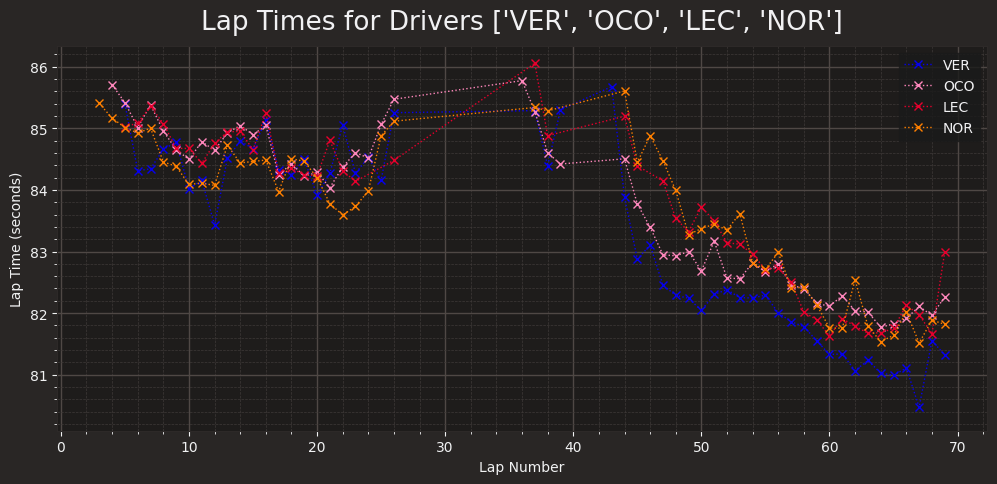

In [59]:
plot_drivers_laptimes(session, ['VER', 'OCO', 'LEC', 'NOR'], start_lap=1, end_lap=session.total_laps)

In [39]:
def plot_driver_laptime_distribution_by_tire(driver_laps, finishing_order, driver_colors):
    fig, ax = plt.subplots(figsize=(12, 5))
    all_driver_laps["LapTime(s)"] = all_driver_laps["LapTime"].dt.total_seconds()
    """ violin= sns.violinplot(data=driver_laps,
                x="Driver",
                y="LapTime(s)",
                width=1,
                dodge=False,
                hue="Driver",
                order=finishing_order,
                hue_order=finishing_order,
                palette=driver_colors,
                whiskerprops=dict(color='white'),
                capprops=dict(color='white')
                ) """
    # Identify location of correct violins
    """ for i, violin_collection in enumerate(violin.collections):
        print("Violin", i+1, ":", violin_collection)
        if i%2==0:
            violin.collections[i].set_alpha(0) """

    # Show spread of laptimes by tire type
    sns.swarmplot(data=driver_laps,
                x="Driver",
                y="LapTime(s)",
                order=finishing_order,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                #hue_order=["SOFT", "MEDIUM", "HARD"],
                hue_order=fastf1.plotting.list_compounds(session),
                linewidth=0,
                size=3,
                )

    # Drivers who DNF'd have reduced opacity
    """ for d in range(len(finishing_order)):
        drvr=finishing_order[d]
        n = np.where(results['Abbreviation']==drvr)[0][0]
        if results['ClassifiedPosition'][d]=='R':
            #print(f"{d} {results['Abbreviation'][d]}")
            violin.collections[2*d].set_alpha(0.3) """

    ax.set_xlabel("Driver")
    ax.set_ylabel("Lap Time (s)")
    plt.suptitle(f"2024 {session_name} Grand Prix Lap Time Distributions")
    ax.legend(bbox_to_anchor=(1.10, 1.02))
    plt.show()

/Users/peterclark/opt/anaconda3/envs/main/lib/python3.10/site-packages/fastf1/plotting/__init__.py:82: FutureWarning: COMPOUND_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "


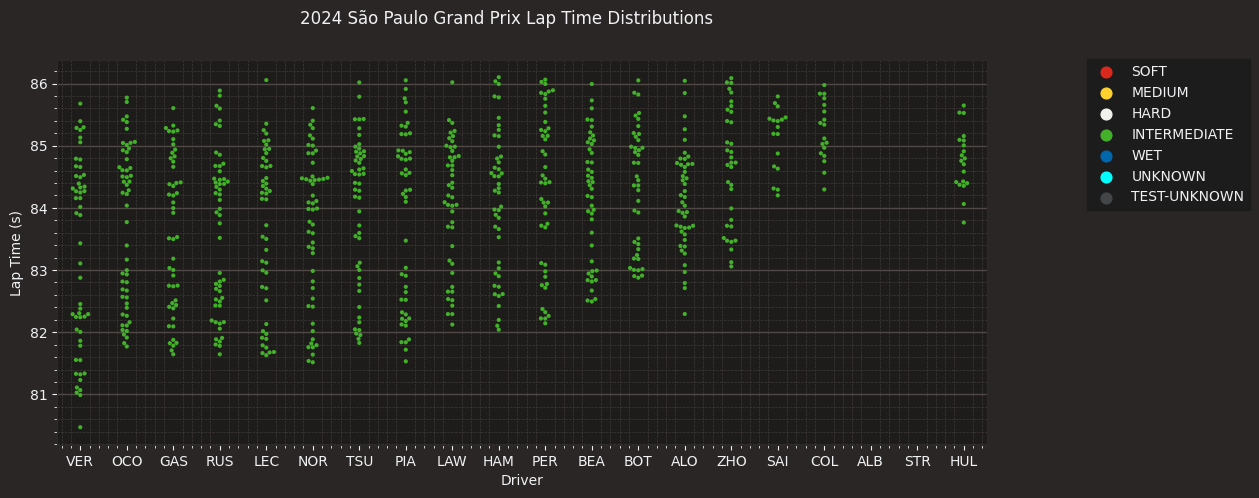

In [40]:
plot_driver_laptime_distribution_by_tire(all_driver_laps, finishing_order, driver_colors)

In [17]:
fastf1.Cache.clear_cache()

: 